In [2]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("model_annotations_liwc_h.csv", delimiter=';')

In [4]:
df.head()

,text,proc_text,model_unanimous,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,"Dear World:family_man_woman_girl_boy:, you nee...","Dear World:family_man_woman_girl_boy:, you nee...",PO,1,32,52.84,75.49,1.63,1.00,16.0,...,0.0,0.0,59.38,3.13,6.25,0.0,0.0,0.00,50.00,12.5
1,.@fordnation says releasing the projection mod...,.@fordnation says releasing the projection mod...,PO,1,28,96.35,3.12,48.09,1.00,28.0,...,0.0,0.0,32.14,3.57,3.57,0.0,0.0,3.57,21.43,0.0
2,"""Neurologists around the world say that a smal...","""Neurologists around the world say that a smal...",UN,1,34,93.03,24.36,4.60,20.23,17.0,...,0.0,0.0,20.59,2.94,0.00,0.0,0.0,2.94,14.71,0.0
3,Coronavirus: More than one million cases confi...,Coronavirus: More than one million cases confi...,UN,1,34,93.03,40.06,12.44,1.85,17.0,...,0.0,0.0,14.71,5.88,0.00,0.0,0.0,0.00,8.82,0.0
4,"This is my Gov, @henrymcmaster, today, 4/2/202...","This is my Gov, @henrymcmaster, today, 4/2/202...",UN,1,42,81.45,54.27,72.58,3.20,10.5,...,0.0,0.0,38.10,7.14,11.90,0.0,0.0,2.38,16.67,0.0


In [5]:
df.drop('Segment', axis=1,inplace=True)

In [6]:
df.drop(['text','proc_text'], axis=1,inplace=True)

In [7]:
y = df.pop('model_unanimous',)

In [8]:
round(y.value_counts()*100/len(y),3)

model_unanimous
PO    55.143
UN    37.490
PP     7.367
Name: count, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, shuffle=True, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10142, 118), (2536, 118), (10142,), (2536,))

In [10]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [11]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(X_train, y_train)

c:\Users\cribr\.virtualenvs\supervised_part-u41BGbC3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
reg.score(X_test,y_test)

0.9376971608832808

In [13]:
y_test

11681    UN
508      PO
427      PO
7465     PO
8694     PO
         ..
3147     UN
12161    PO
11498    PO
4322     PO
6103     UN
Name: model_unanimous, Length: 2536, dtype: object

In [14]:
y_pred_test=reg.predict(X_test)

              precision    recall  f1-score   support

          PO       0.96      0.98      0.97      1409
          PP       0.79      0.76      0.77       188
          UN       0.94      0.91      0.92       939

    accuracy                           0.94      2536
   macro avg       0.89      0.88      0.89      2536
weighted avg       0.94      0.94      0.94      2536



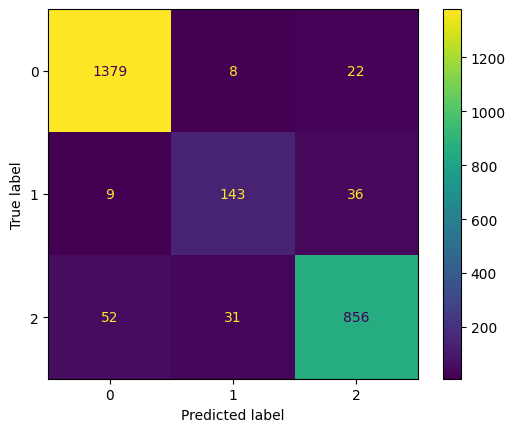

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_test,y_pred_test))

conf_m=confusion_matrix(y_test,y_pred_test)

ConfusionMatrixDisplay(conf_m).plot()

In [16]:
import pickle

with open('models/regression_1.pkl','wb') as file:
    pickle.dump(reg, file)

In [17]:
with open('models/regression_1.pkl','rb') as file:
    reg = pickle.load(file)

In [18]:
reg.predict(X_test)

array(['UN', 'PO', 'PO', ..., 'PO', 'PO', 'UN'], dtype=object)